<a href="https://colab.research.google.com/github/ShrutiThorat/PlantDiseaseDetection/blob/main/PlantDiseaseDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount data from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

**Load Data into Train and Test Variables.** 

In [ ]:
train_dir ='/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN'
test_dir='/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST'

In [ ]:
!ls /content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST

Pepper_bell_Bacterial_spot  Tomato_Late_blight
Pepper_bell_healthy	    Tomato_Leaf_Mold
Potato_Early_blight	    Tomato_mosaic_virus
Potato_healthy		    Tomato_Septoria_leaf_spot
Potato_Late_blight	    Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Bacterial_spot	    Tomato_Target_Spot
Tomato_Early_blight	    Tomato_YellowLeaf_Curl_Virus
Tomato_healthy


**Visualization**

Training Dataset

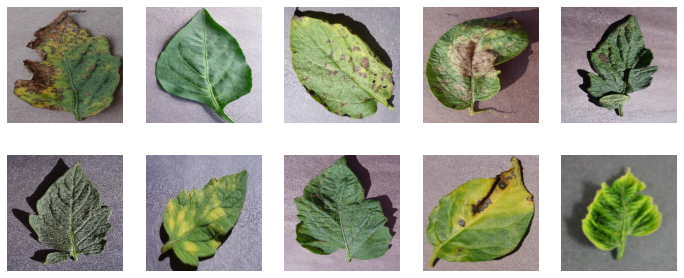

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Bacterial_spot/8d56489d-58dc-43d8-a399-906b18b78566___GCREC_Bact.Sp 3081.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Pepper_bell_healthy/8b0c55d7-2d4b-447f-a788-05f18b781b86___JR_HL 8064.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Potato_Early_blight/8e05b766-d0a9-4621-9bb4-d16bef411dda___RS_Early.B 7238.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Potato_Late_blight/09a215a1-a539-4635-a27f-232229ff11f4___RS_LB 4529.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Early_blight/9b84e7ac-4ffd-4e0b-8099-86f30ad23cda___RS_Erly.B 7731.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_healthy/7e37d8c3-2f62-4a95-b430-34746cb25776___RS_HL 0188.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Leaf_Mold/20e63ca2-e070-422c-9839-9cac224719e5___Crnl_L.Mold 8650.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Target_Spot/8f675e4c-4511-47dd-9a01-41a8fe736dd4___Com.G_TgS_FL 8079.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Pepper_bell_Bacterial_spot/9abd1ec5-33f5-418d-8527-c894dd7739d7___JR_B.Spot 9064.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_YellowLeaf_Curl_Virus/4ecba79a-86e4-4948-9597-974285be499a___UF.GRC_YLCV_Lab 01608.JPG")
plt.imshow(img)

Testing Dataset

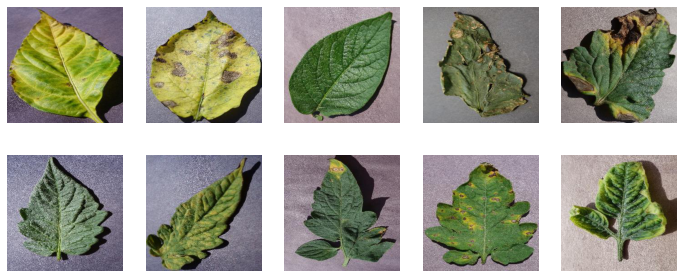

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(12, 5))
sp = plt.subplot(2, 5, 1)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Pepper_bell_Bacterial_spot/0d8421cd-eebc-4018-b591-12352dd970a7___JR_B.Spot 3234.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 2)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Potato_Early_blight/0d9dbf50-53a9-42b2-8b29-0360fb7dbd98___RS_Early.B 6692.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 3)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Potato_healthy/1a1184f8-c414-4ead-a4c4-41ae78e29a82___RS_HL 1971.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 4)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Bacterial_spot/0ad88d7a-c14a-4ac9-8520-c11a0ade3a8f___UF.GRC_BS_Lab Leaf 0996.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 5)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Early_blight/0e2e58b7-1417-49c4-b014-b5efb4b4b831___RS_Erly.B 8256.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 6)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_healthy/0a31e630-0d98-416b-b0e4-88a88aad1dc5___RS_HL 9653.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 7)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Leaf_Mold/0db4cbf4-fa94-42c8-8bf5-90114281c569___Crnl_L.Mold 8681.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 8)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Target_Spot/1b46f9fb-4e90-4cbf-bad5-78414e389be2___Com.G_TgS_FL 8001.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 9)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Septoria_leaf_spot/0a76257e-6a78-459b-8f51-a266805121eb___Matt.S_CG 2527.JPG")
plt.imshow(img)

sp = plt.subplot(2, 5, 10)
sp.axis('Off')
img = mpimg.imread("/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_YellowLeaf_Curl_Virus/0a9e37a2-95d5-4af7-95a1-2cbb67074452___YLCV_NREC 2291.JPG")
plt.imshow(img)

**Function To count Images In Each DataSet**

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

**View number of images in each**

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
16520 Train images
4128 Test images


**Pre-processing our raw data into usable format**

In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

*   Rescaling image values between (0 –1) called normalization
*   All these parameters are stored in the variable "train_datagen and test_datagen"



**Generating augmented data from train and test directories**

In [ ]:
# set height and width and color of input image.
width,height =256,256
input_shape=(width,height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(width,height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(width,height),
                                                   batch_size=batch_size)

Found 16520 images belonging to 15 classes.
Found 4128 images belonging to 15 classes.




*   Takes the path to a directory, and generates batches of augmented data. Yields batches indefinitely, in an infinite loop.
*   Batch Size refers to the number of training examples utilized in one iteration.



**Get 15 Diseases Names/classes**



In [ ]:
train_generator.class_indices

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato_Target_Spot': 11,
 'Tomato_YellowLeaf_Curl_Virus': 12,
 'Tomato_healthy': 13,
 'Tomato_mosaic_virus': 14}

**CNN Parameter Building**

In [ ]:
# CNN building.

model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

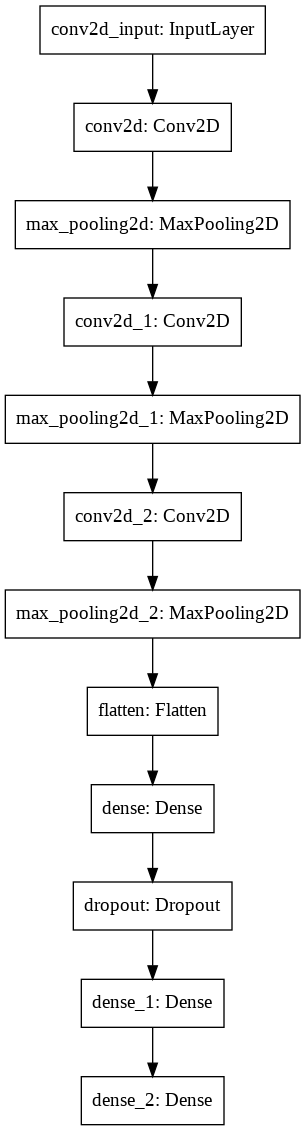

In [ ]:
keras.utils.plot_model(model, "my_cnn_model.png")

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


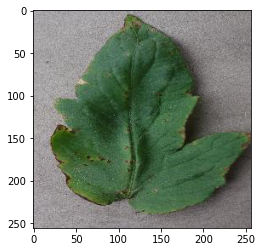

In [ ]:
# Take one image to visualize it's changes after every layer

from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Bacterial_spot/8bd2f1ec-3094-479f-9210-f7fba270922d___GCREC_Bact.Sp 6256.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TRAIN/Tomato_Bacterial_spot/8bd2f1ec-3094-479f-9210-f7fba270922d___GCREC_Bact.Sp 6256.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
#'conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2'
# Visualizing output after every layer.

from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_3_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_3_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

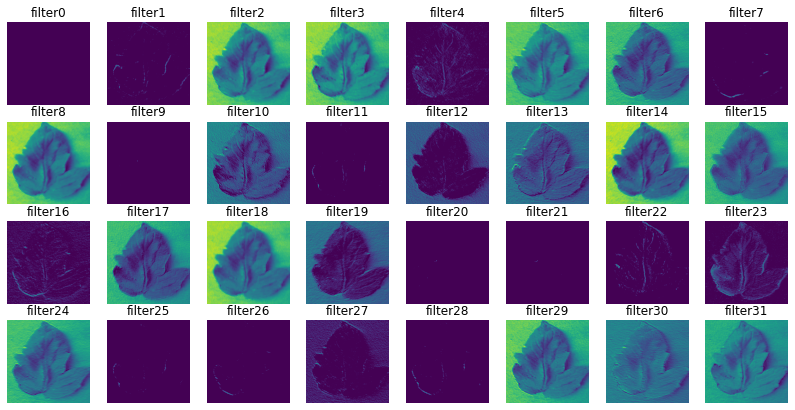

In [ ]:
#conv2d_1_features
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

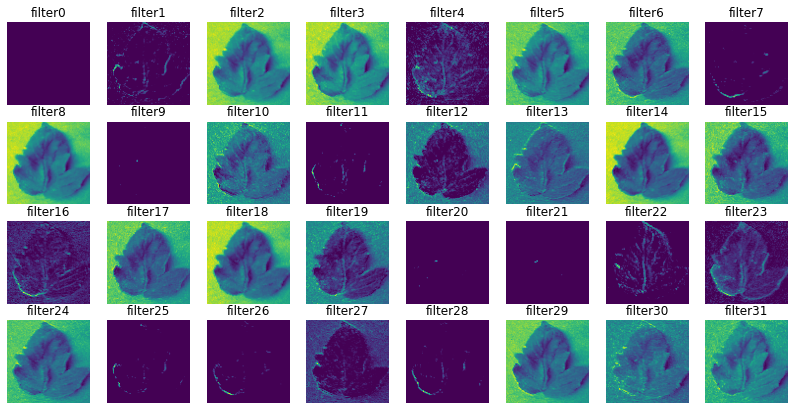

In [ ]:
#max_pooling2d_1_features

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

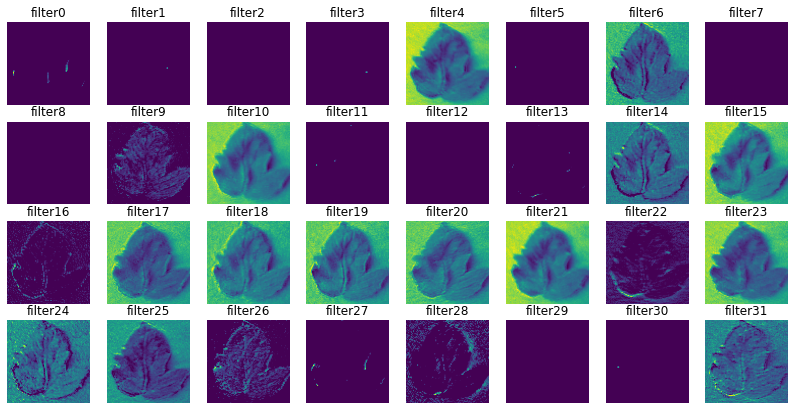

In [ ]:
#conv2d_2_features

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

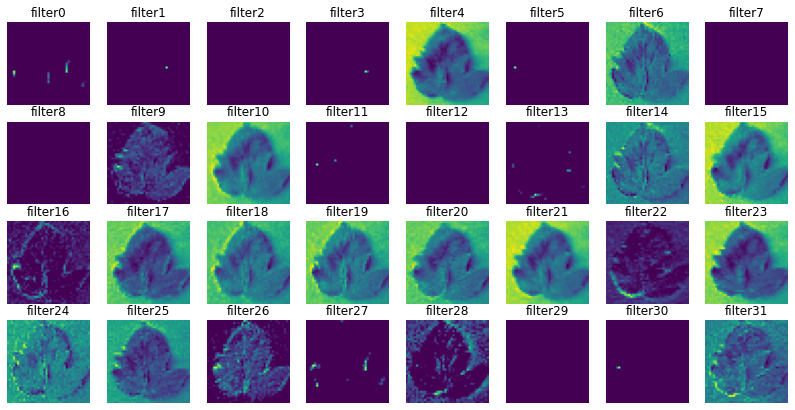

In [ ]:
# max_pooling2d_2_features

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

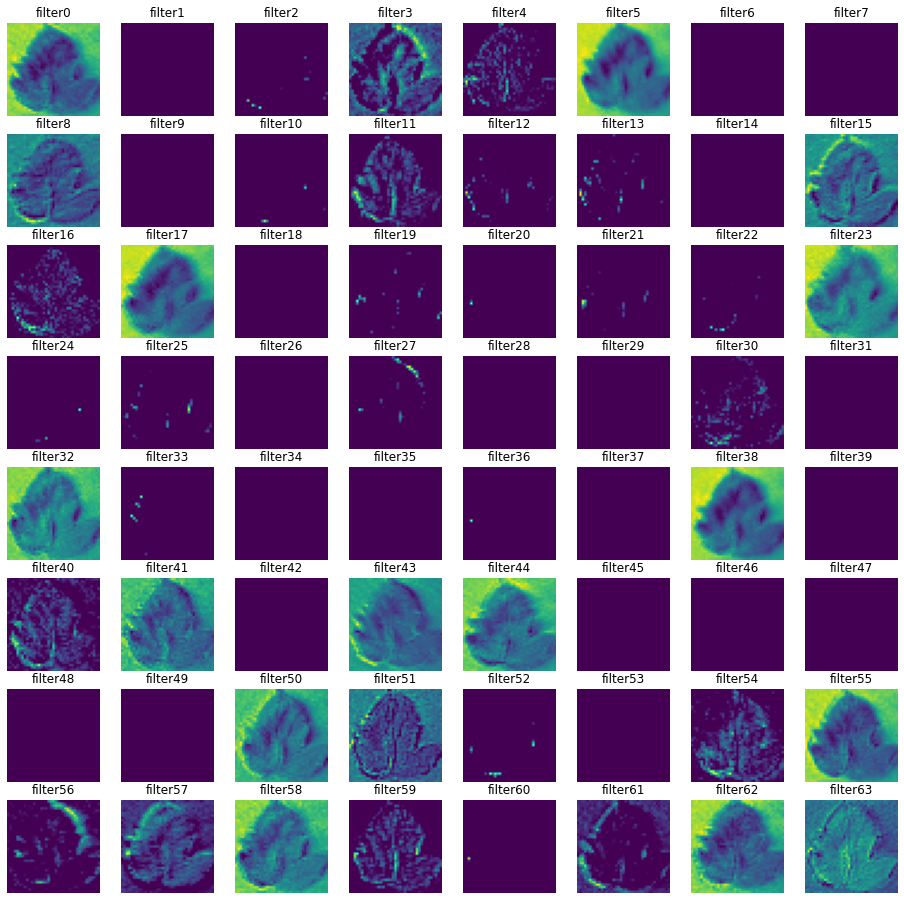

In [ ]:
# conv2d_3_features

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

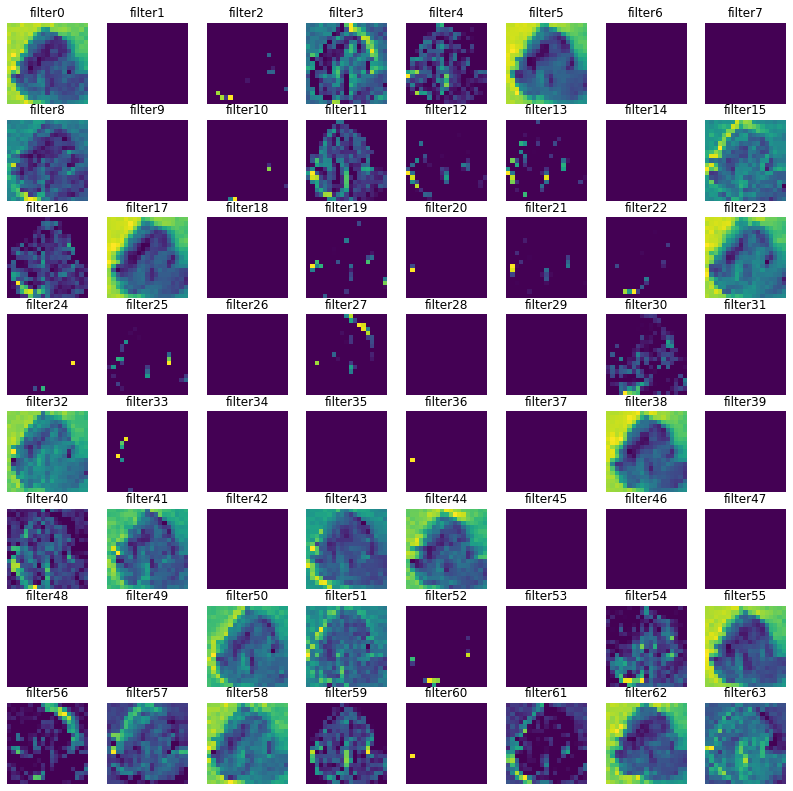

In [ ]:
#max_pooling2d_3_features

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i],cmap='viridis')
plt.show()

**Training CNN with Parameters**

In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(height, width),
    batch_size=batch_size) 

Found 16520 images belonging to 15 classes.


In [ ]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])  #config the model with losses and metrics with model.compile()
train=model.fit_generator(train_generator,
                          epochs=15,
                          #steps_per_epoch=100,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                        verbose=1)

Epoch 1/15
516/516 [==============================] - 3762s 7s/step - loss: 1.7949 - accuracy: 0.4119 - val_loss: 0.7553 - val_accuracy: 0.7373
Epoch 2/15
516/516 [==============================] - 462s 896ms/step - loss: 0.6943 - accuracy: 0.7620 - val_loss: 0.3922 - val_accuracy: 0.8671
Epoch 3/15
516/516 [==============================] - 464s 900ms/step - loss: 0.4881 - accuracy: 0.8264 - val_loss: 0.3210 - val_accuracy: 0.8892
Epoch 4/15
516/516 [==============================] - 467s 906ms/step - loss: 0.3870 - accuracy: 0.8720 - val_loss: 0.2830 - val_accuracy: 0.9044
Epoch 5/15
516/516 [==============================] - 469s 909ms/step - loss: 0.3162 - accuracy: 0.8887 - val_loss: 0.2296 - val_accuracy: 0.9236
Epoch 6/15
516/516 [==============================] - 468s 908ms/step - loss: 0.2516 - accuracy: 0.9128 - val_loss: 0.1957 - val_accuracy: 0.9317
Epoch 7/15
516/516 [==============================] - 470s 912ms/step - loss: 0.2148 - accuracy: 0.9294 - val_loss: 0.1456 - v

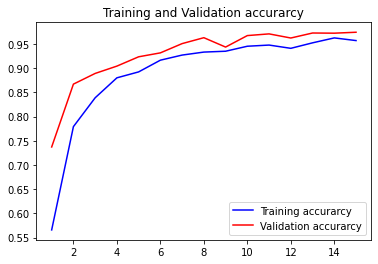

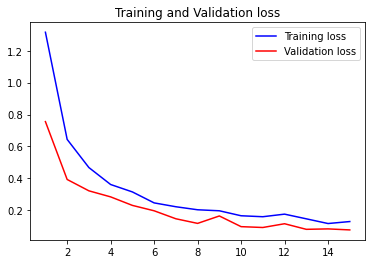

In [ ]:
from keras.callbacks import History 
#history = History()

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']

epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

129/129 [==============================] - 808s 6s/step - loss: 0.1608 - accuracy: 0.9489
Test score is 0.1608356386423111
Test accuracy is 0.9488856792449951


**Saving Model weights**

In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
classes = train_generator.class_indices 
classes

{'Pepper_bell_Bacterial_spot': 0,
 'Pepper_bell_healthy': 1,
 'Potato_Early_blight': 2,
 'Potato_Late_blight': 3,
 'Potato_healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato_Target_Spot': 11,
 'Tomato_YellowLeaf_Curl_Virus': 12,
 'Tomato_healthy': 13,
 'Tomato_mosaic_virus': 14}

**Load Model from saved weights**

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')

Classes = ["Pepper_bell_Bacterial_spot","Pepper_bell_healthy","Potato_Early_blight","Potato_Late_blight","Potato_healthy","Tomato_Bacterial_spot",
           "Tomato_Early_blight","Tomato_Late_blight","Tomato_Leaf_Mold","Tomato_Septoria_leaf_spot","Tomato_Spider_mites_Two-spotted_spider_mite",
           "Tomato_Target_Spot","Tomato_YellowLeaf_Curl_Virus","Tomato_healthy","Tomato_mosaic_virus"]


**Predictions**

Tomato_Early_blight


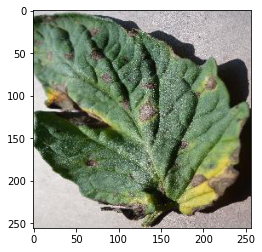

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Tomato_Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Potato_Late_blight


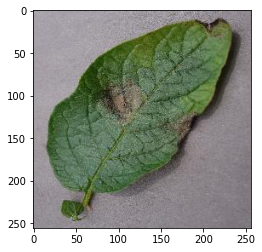

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Potato_Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Potato_Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG')
plt.imshow(disease)
print (Classes[int(result)])

Pepper_bell_Bacterial_spot


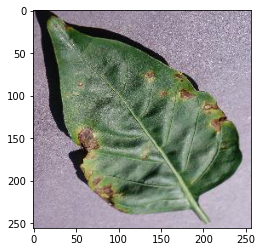

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Pepper_bell_Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG')])
disease = image.load_img('/content/drive/MyDrive/PlantDiseaseData/PlantDisease_Train_Test/TEST/Pepper_bell_Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG')
plt.imshow(disease)
print (Classes[int(result)])